In [1]:
import numpy as np
import cv2
from skimage.metrics import structural_similarity as ssim
import matplotlib.pyplot as plt

In [2]:
def eval_single(img1, img2, obj):
    # convert to grayscale image
    gray1 = cv2.cvtColor(img1, cv2.COLOR_BGR2GRAY)
    gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

    # Calculation accuracy
    diff_pixels = np.sum(gray1 != gray2)
    total_pixels = gray1.shape[0] * gray1.shape[1]
    accuracy = (1 - diff_pixels / total_pixels) * 100
    # print('Accuracy:', accuracy)
    obj["accuracy"] += accuracy

    # Calculate the mean squared error (MSE)
    mse = np.mean((gray1 - gray2) ** 2)
    # print('MSE:', mse)
    obj["mse"] += mse

    # Compute the Structural Similarity Index (SSIM) between the two
    # images, ensuring that the difference image is returned
    (score, diff) = ssim(gray1, gray2, full=True)
    diff = (diff * 255).astype("uint8")

    # Print the score
    # print("SSIM: {}".format(score))
    obj["ssim"] += score

In [3]:
def evaluate(type_, iter=5):
    frame = [47, 48, 49]

    tmp = {"accuracy": 0, "mse": 0, "ssim": 0}
    str_iter = "" if type_ == "ML" else str(iter)

    for i in frame:
        # read pictures
        img1 = cv2.imread('Hula.Fore.ACKGT.000' + str(i) + '.png')
        img2 = cv2.imread("../" + type_ + "/" + type_ + "_res" + str_iter + ".00" + str(i) + ".png")

        eval_single(img1, img2, tmp)

    print(type_, "iter: ", iter, ": ")
    for key in tmp:
        tmp[key] = tmp[key] / len(tmp)
        print(key, ":", tmp[key])
    print()
    return tmp

In [4]:
def show_3_5():
    ML = evaluate("ML")
    MRF_3D_3 = evaluate("3D", 3)
    MRF_3D_5 = evaluate("3D", 5)
    MRF_motion_3 = evaluate("motion", 3)
    MRF_motion_5 = evaluate("motion", 5)
    MRF_2D_3 = evaluate("2D", 3)
    MRF_2D_5 = evaluate("2D", 5)

    obj_list = [ML, MRF_3D_3, MRF_3D_5, MRF_motion_3, MRF_motion_5, MRF_2D_3, MRF_2D_5]
    str_obj_list = ['ML', 'MRF_2D_3', 'MRF_2D_5', 'MRF_3D_3', 'MRF_3D_5', 'MRF_motion_3', 'MRF_motion_5']

    # Create a list to store the accuracy, mse, ssim of each object
    accuracy_list = []
    mse_list = []
    ssim_list = []

    # Traverse the dictionary and add the accuracy, mse, ssim of each object to the list
    for obj in obj_list:
        accuracy_list.append(obj['accuracy'])
        mse_list.append(obj['mse'])
        ssim_list.append(obj['ssim'])

    # 设置图表的x轴和y轴
    x_label = str_obj_list
    y_label = [accuracy_list, mse_list, ssim_list]

    # 创建一个图表
    fig = plt.figure(figsize=(10, 10))
    plt.title('Performance comparison of different algorithms')

    # 将图表转换为3个子图
    ax1 = fig.add_subplot(311)
    ax2 = fig.add_subplot(312)
    ax3 = fig.add_subplot(313)

    # 绘制3条折线图
    ax1.plot(x_label, accuracy_list, 'r-', label='accuracy')
    ax2.plot(x_label, mse_list, 'g-', label='mse')
    ax3.plot(x_label, ssim_list, 'b-', label='ssim')

    # 添加图表的x轴和y轴标签
    ax1.set_xlabel('Objects')
    ax1.set_ylabel('Accuracy')
    ax2.set_xlabel('Objects')
    ax2.set_ylabel('MSE')
    ax3.set_xlabel('Objects')
    ax3.set_ylabel('SSIM')

    # 添加图表的图例
    ax1.legend(loc='upper right')
    ax2.legend(loc='upper right')
    ax3.legend(loc='upper right')

    # 显示图表
    plt.show()

In [5]:
    MRF_2D_1 = evaluate("2D", 1)
    MRF_2D_2 = evaluate("2D", 2)
    MRF_2D_3 = evaluate("2D", 3)
    MRF_2D_4 = evaluate("2D", 4)
    MRF_2D_5 = evaluate("2D", 5)

    MRF_3D_1 = evaluate("3D", 1)
    MRF_3D_2 = evaluate("3D", 2)
    MRF_3D_3 = evaluate("3D", 3)
    MRF_3D_4 = evaluate("3D", 4)
    MRF_3D_5 = evaluate("3D", 5)

    MRF_3D_MC_1 = evaluate("motion", 1)
    MRF_3D_MC_2 = evaluate("motion", 2)
    MRF_3D_MC_3 = evaluate("motion", 3)
    MRF_3D_MC_4 = evaluate("motion", 4)
    MRF_3D_MC_5 = evaluate("motion", 5)

2D iter:  1 : 
accuracy : 97.36008632330247
mse : 0.026399136766975306
ssim : 0.943173189726629

2D iter:  2 : 
accuracy : 97.443546248071
mse : 0.025564537519290123
ssim : 0.9577519551468315

2D iter:  3 : 
accuracy : 97.46802059220677
mse : 0.025319794077932098
ssim : 0.9595347939897086

2D iter:  4 : 
accuracy : 97.48393494405865
mse : 0.02516065055941358
ssim : 0.9606319255538649

2D iter:  5 : 
accuracy : 97.4950569058642
mse : 0.025049430941358027
ssim : 0.9614864214968611

3D iter:  1 : 
accuracy : 97.3117705922068
mse : 0.11542576919367285
ssim : 0.9408020566690709

3D iter:  2 : 
accuracy : 97.34774365837193
mse : 0.08480827425733024
ssim : 0.9471660769526342

3D iter:  3 : 
accuracy : 97.35396773726852
mse : 0.07917631172839507
ssim : 0.9476791405212506

3D iter:  4 : 
accuracy : 97.35627350983795
mse : 0.07612726658950617
ssim : 0.9478619530115159

3D iter:  5 : 
accuracy : 97.3569968894676
mse : 0.07489089023919752
ssim : 0.9479262460065833

motion iter:  1 : 
accuracy : 97

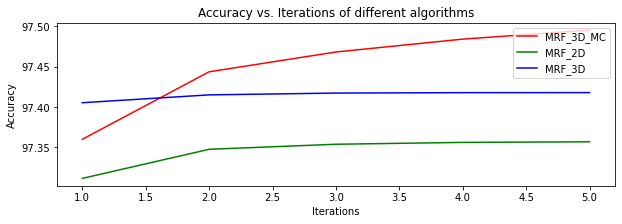

In [12]:
def show_iters():
    MRF_2D_list = [MRF_2D_1, MRF_2D_2, MRF_2D_3, MRF_2D_4, MRF_2D_5]
    MRF_3D_list = [MRF_3D_1, MRF_3D_2, MRF_3D_3, MRF_3D_4, MRF_3D_5]
    MRF_3D_MC_list = [MRF_3D_MC_1, MRF_3D_MC_2, MRF_3D_MC_3, MRF_3D_MC_4, MRF_3D_MC_5]
    str_obj_list = ['MRF_2D_1', 'MRF_2D_2', 'MRF_2D_3', 'MRF_2D_4', 'MRF_2D_5']

    # Create a list to store the accuracy, mse, ssim of each object
    MRF_2D_accuracy_list = []
    MRF_3D_accuracy_list = []
    MRF_3D_MC_accuracy_list = []

    # Traverse the dictionary and add the accuracy, mse, ssim of each object to the list
    for i in range(5):
        MRF_2D_accuracy_list.append(MRF_2D_list[i]['accuracy'])
        MRF_3D_accuracy_list.append(MRF_3D_list[i]['accuracy'])
        MRF_3D_MC_accuracy_list.append(MRF_3D_MC_list[i]['accuracy'])

    # 设置图表的x轴和y轴
    x_label = [1,2,3,4,5]
    y_label = [MRF_2D_accuracy_list]

    # 创建一个图表
    fig = plt.figure(figsize=(10, 3))
    plt.title('Accuracy vs. Iterations of different algorithms')

    # 绘制3条折线图
    plt.plot(x_label, MRF_2D_accuracy_list, 'r-', label='MRF_3D_MC')
    plt.plot(x_label, MRF_3D_accuracy_list, 'g-', label='MRF_2D')
    plt.plot(x_label, MRF_3D_MC_accuracy_list, 'b-', label='MRF_3D')

    # 添加图表的x轴和y轴标签
    plt.xlabel('Iterations')
    plt.ylabel('Accuracy')
    # ax2.set_xlabel('Objects')
    # ax2.set_ylabel('MSE')
    # ax3.set_xlabel('Objects')
    # ax3.set_ylabel('SSIM')

    # 添加图表的图例
    plt.legend(loc='upper right')
    # ax2.legend(loc='upper right')
    # ax3.legend(loc='upper right')

    # 显示图表
    plt.show()
    
show_iters()